In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import numpy as np
import matplotlib.pyplot as plt
from core.greeks import monte_carlo_delta


In [2]:
K = 100
T = 1
r = 0.05
sigma = 0.2
num_sim = 100_000

spot_prices = np.linspace(80, 120, 25)
deltas = []

for S in spot_prices:
    delta = monte_carlo_delta(S, K, T, r, sigma, num_sim, h=1.0, option_type='call')
    deltas.append(delta)


###  Delta Sensitivity Analysis

This plot shows the change in Delta as the spot price varies for a European Call option. Delta increases from near 0 (deep out-of-the-money) to near 1 (deep in-the-money), confirming theoretical expectations.

We use finite difference method via Monte Carlo simulations.


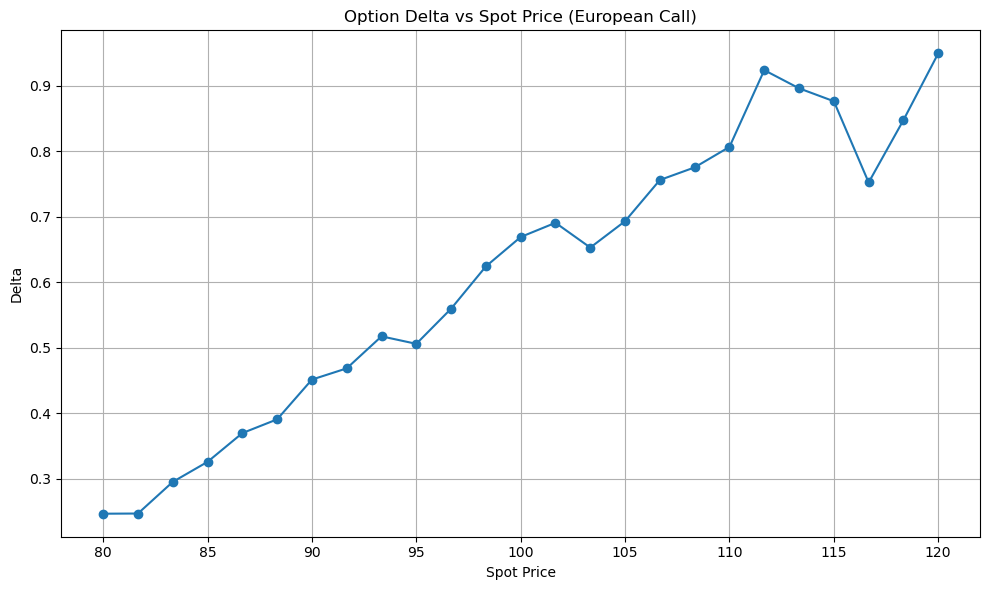

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, deltas, marker='o')
plt.xlabel("Spot Price")
plt.ylabel("Delta")
plt.title("Option Delta vs Spot Price (European Call)")
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/delta_vs_spot.png")
plt.show()


In [4]:
from core.greeks import monte_carlo_gamma_crn

gammas = []
num_sim = 300_000
h = 0.5

for S in spot_prices:
    np.random.seed(42)  # Her fiyat için aynı Z yapısı
    gamma = monte_carlo_gamma_crn(S, K, T, r, sigma, num_simulations=num_sim, h=h, option_type='call')
    gammas.append(gamma)

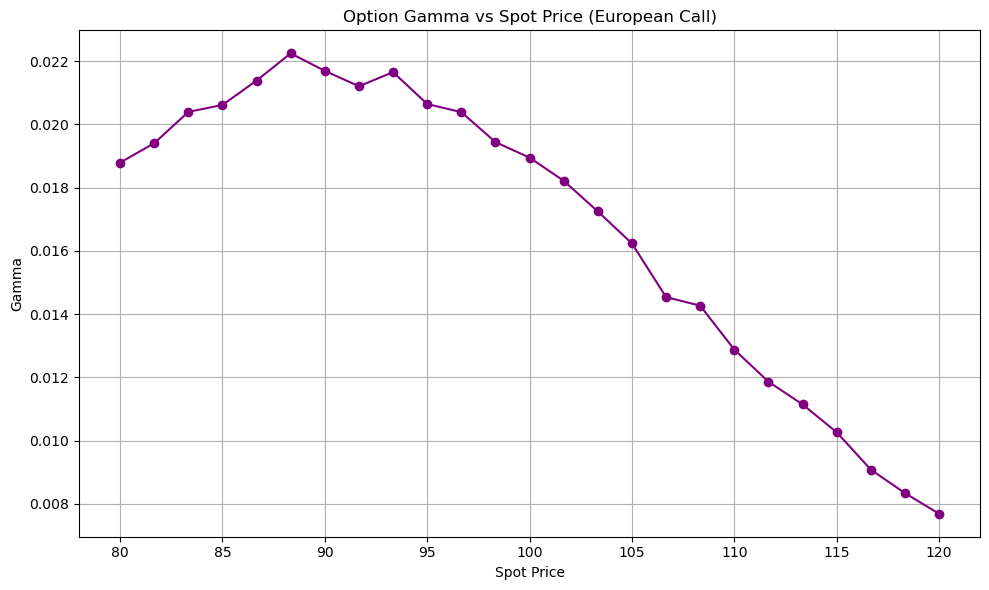

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, gammas, marker='o', color='purple')
plt.xlabel("Spot Price")
plt.ylabel("Gamma")
plt.title("Option Gamma vs Spot Price (European Call)")
plt.grid(True)
plt.tight_layout()
plt.savefig("../assets/gamma_vs_spot.png")
plt.show()


###  Gamma Sensitivity (European Call)

Gamma measures the **curvature** of the option price with respect to the underlying asset. It reaches its peak near the **at-the-money** level, where Delta changes the fastest.

This plot was generated via central finite difference using Monte Carlo simulation. To improve numerical stability, a large number of simulations and a smaller finite difference step were used.
